### Notebook 3_6

## Discrete-Time System — System Model

#### Student Learning Outcomes

* Learn the difference equations for discrete-time system
* Learn the Z transform
* Learn the transfer function for discrete-time system
* Learn the stability of discrete-time system
--------------------

In [1]:
# import at first
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 1: Difference Equation As System</h2>
</div>


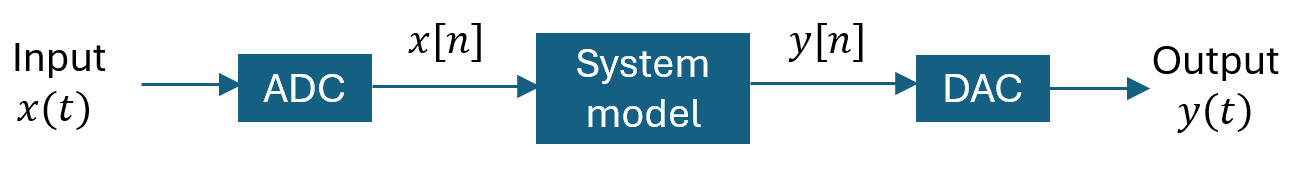

In this class, we will explore the middle part of this process
* **$x[n] \longrightarrow y[n]$**: **Discrete-Time System Model**

----------
For discrete-time system, its model is represeted by the **difference equation**.

$$y[n] + a_1 y[n-1] + \dots + a_N y[n-N] = b_0 x[n] + b_1 x[n-1] + \dots + b_M x[n-M]$$

- $y[n]$: Output at time \( n \)
- $x[n]$: Input at time \( n \)
- $a_k, b_k$: Coefficients
- There is no $[n+1], [n+2], \cdots$. Since it has to be causal.

----
The System Order depends on how many delays $y[n]$ has. 

For example:
- **First-Order Difference Equation:**
    $y[n] - 0.5 y[n-1] = x[n]$
    This equation includes only one delayed term $ y[n-1] $

- **Second-Order Difference Equation:**
    $y[n] - 1.2 y[n-1] + 0.32 y[n-2] = x[n]$
    This equation includes two delayed output terms $y[n-1]$ and $y[n-2]$

--------
One good thing of difference equations is that they can be **easily coded using computer programming languages**, even with low-level programming languages.

For example, this difference equation can be coded in Assembly language, a low-level programming language (https://en.wikipedia.org/wiki/Assembly_language):

$$y[n] = 0.5 y[n-1] + x[n]$$

```assembly
; Assume x[n] stored in memory X, y[n] in memory Y
LOAD Y[n-1]      ; Load previous output
MUL 0.5          ; Multiply by coefficient
ADD X[n]         ; Add current input
STORE Y[n]       ; Store result back as current output
```

In high-level programming languages such as Python, this equation is just a single line code:

```python
y_n = 0.5 * y_n_minus_1 + x_n
```

--------
#### Code Practice

> Note: To code a difference equation, always rewrite it with $y[n]$ only on the left-hand side (i.e., solved for $y[n]$). This format is crucial for implementation in code.

**Practice 1** 
* Input is a sequential as $x[n] = [5, 5, 2, 4, -6, 8, 4, 4, 7]$
* Output is initial condition: $y[0] = 0$, $y[1] = 0$ 
* Difference equation is $y[n] - 1.2 y[n-1] + 0.32 y[n-2] = x[n]$
* It is your job to fill the code and plot

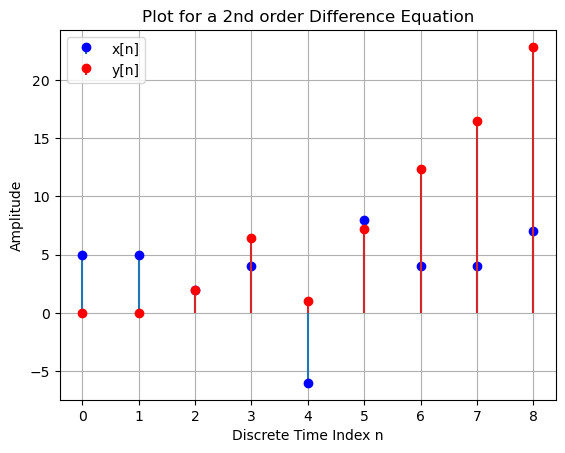

In [2]:
# Input signal
x = np.array([5, 5, 2, 4, -6, 8, 4, 4, 7])
n_samples = len(x)

# Initialize output as a NumPy array
y_out = np.zeros(n_samples)

# Initial conditions
y_out[0] = 0
y_out[1] = 0
y_n_minus_2 = y_out[0]
y_n_minus_1 = y_out[1]

# Loop from n = 2
for n in range(2, n_samples):
    x_n = x[n]
    y_n = 1.2*y_n_minus_1-0.32*y_n_minus_2+x_n
    y_out[n] = y_n
    # Update
    y_n_minus_2 = y_n_minus_1
    y_n_minus_1 = y_n

# Plotting
n = np.arange(n_samples)
plt.stem(n, x, linefmt='tab:blue', markerfmt='bo', basefmt=' ', label='x[n]')
plt.stem(n, y_out, linefmt='tab:red', markerfmt='ro', basefmt=' ', label='y[n]')
plt.title('Plot for a 2nd order Difference Equation')
plt.xlabel('Discrete Time Index n')
plt.ylabel('Amplitude')
plt.xticks(n)
plt.grid(True)
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 1 pt</strong>
</span>

**Practice 2** 
* Input is a unit step input lasting for 20 samples
* Output is initial condition: $y[0] = 0$, 
* Difference equation is $y[n] - 0.5 y[n-1] = x[n]$
* It is your job to fill the code and plot

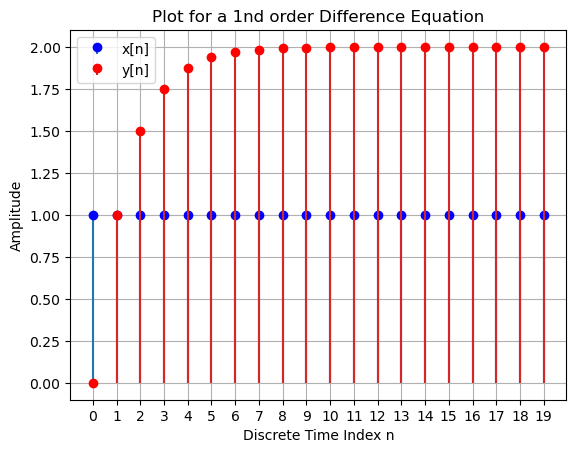

In [4]:
# Unit step input
n_samples = 20
x = np.ones(n_samples)

# Initialize output array
y_out = np.zeros(n_samples)

# Initial condition
y_out[0] = 0
y_n_minus_1 = y_out[0]

# Loop from n = 1 
for n in range(1, n_samples):
    x_n = x[n]
    y_n = 0.5*y_n_minus_1+ x_n
    y_out[n] = y_n
    # Update
    y_n_minus_1 = y_n  

# Plotting
n = np.arange(n_samples)
plt.stem(n, x, linefmt='tab:blue', markerfmt='bo', basefmt=' ', label='x[n]')
plt.stem(n, y_out, linefmt='tab:red', markerfmt='ro', basefmt=' ', label='y[n]')
plt.title('Plot for a 1nd order Difference Equation')
plt.xlabel('Discrete Time Index n')
plt.ylabel('Amplitude')
plt.xticks(n)
plt.grid(True)
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 2: Solving Systems with Z-Transform</h2>
</div>


With code, we can easily plot the output $y[n]$ for a discrete-time system. 

But if we want to obtain the math expression of $y[n]$, we need to make use of Z transform to help us.

Its general idea is the same as Laplace Transform used in continuous-time systems.
| Step | Continuous-Time System (Laplace)                                     | Discrete-Time System (Z-Transform)                                  |
|------|----------------------------------------------------------------------|----------------------------------------------------------------------|
| 1    | Take the Laplace Transform of the differential equation and input $x(t)$ | Take the Z-transform of the difference equation and input $x[n]$ |
| 2    | Solve algebraically for $Y(s)$                                   | Solve algebraically for $Y(z)$                                   |
| 3    | Find $y(t)$ using inverse Laplace Transform                     | Find $y[n]$ using inverse Z-transform                            |

---

Some useful Z Transforms are listed here:

##### 1) Indexed Variables

* For all indexed variables ..$[n]$, direct write as ..$(z)$.
* Commonly use Uppercase in Z domain

| Discrete-time domain | Z domain |
| -------- | ------- |
| $x[n]$  | $X(z)$    | 
| $y[n]$ | $Y(z)$     |

##### 2) Signals

| Discrete-time domain | Z domain |
| -------- | ------- |
| $\delta[n]$  | $1$    | 
| $u[n]$  | $\frac{1}{1-z^{-1}}$    | 
| $a^nu[n]$  | $\frac{1}{1-az^{-1}}$    | 
##### 3) Operations

| Discrete-time domain | Z domain |
| -------- | ------- |
| $x[n-k]$  | $z^{-k}X[z]$    | 

-----------------
**Example**

$$y[n] - 0.5 y[n-1] = x[n]$$
* $x[n] = u[n]$ (unit step)
* Initial Condition is zero
  
**Step 1:** Apply Z-transform:
$$Y(z) - 0.5 z^{-1} Y(z) = \frac{1}{1 - z^{-1}}$$

**Step 2:** Solve for $Y(z)$:
$$Y(z)(1 - 0.5z^{-1}) = \frac{1}{1 - z^{-1}}$$

$$Y(z) = \frac{1}{(1 - z^{-1})(1 - 0.5z^{-1})} = \frac{2}{1-z^{-1}}-\frac{1}{1-0.5z^{-1}}$$

**Step 3:** Inverse Z-transform:
$$y[n] = (2 - 0.5^{n}) u[n]$$

----------
This is the same difference equation as the one in Task 1 Practice 2.

In Python, plot this $y[n]$ using solved expression. It should look the same as the Task 1. 

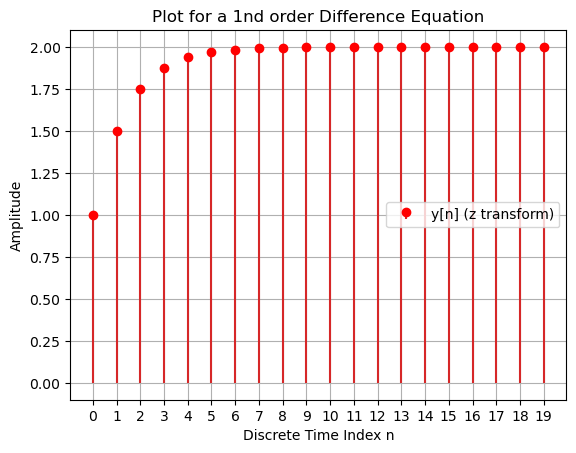

In [5]:
n = np.arange(n_samples)
y_n_Ztransform = 2 - np.power(0.5, n)

plt.stem(n, y_n_Ztransform, linefmt='tab:red', markerfmt='ro', basefmt=' ', label='y[n] (z transform)')
plt.title('Plot for a 1nd order Difference Equation')
plt.xlabel('Discrete Time Index n')
plt.ylabel('Amplitude')
plt.xticks(n)
plt.grid(True)
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Plot: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Task 3: Transfer Function</h2>
</div>


In continuous-time system with Laplace, we use transfer function $H(s) = \frac{Y(s)}{X(s)}$ for system representation and futher analysis.

Here, we can do the similar thing with Z transform.

The transfer function of discrete-time system:

$$H(z) = \frac{Y(z)}{X(z)}$$

* In addition, to avoid non-causal system, we cannot have $z$, $z^2$, ... in transfer function. Every $z$ term should be in negative power, such as $z^{-1}, z^{-2}, ...$

-----------------
**Example**

We revisit the same system given in Task 1 Practice 1.

$$y[n] - 1.2 y[n-1] + 0.32 y[n-2] = x[n]$$

Z transform to it and Obtain transfer function::

$$Y(z) -1.2z^{-1}Y(z) +0.32z^{-2}Y(z) = X(z)$$
$$(1-1.2z^{-1}Y(z) + 0.32z^{-2})Y(z) = X(z)$$
$$H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1-1.2z^{-1} + 0.32z^{-2}}$$

-----------
With transfer functions, we can analyze systems in deep. Let's analyze the stability here.

#### BIBO Stability
The criterion is:
> A discrete-time system represented by a transfer function $H(z)$ is **BIBO stable**, if:
> 
> All roots of its the denominator (i.e., all poles of $H(z)$) lie **inside the unit circle** in the Complex Plane.

For example Task 1 Practice 1.

$$H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1-1.2z^{-1} + 0.32z^{-2}}$$

roots are $1-1.2z^{-1} + 0.32z^{-2} = 0$

$$z_1 = 0.4, z_2 =0.8$$

They are inside the unit circle.

So it is BIBO stable.

--------
Now it is your job, 
* Obtain the unit step response $y[n]$ of these 2 systems: (20 Samples)

**System 1:**
$$y[n] - 1.5 y[n-1] = x[n]$$

**System 2:**
$$y[n] - 0.6y[n-1] + 0.36y[n-2] = x[n]$$

* Plot two responses separately
* You should re-use previous code in Task 1 to help you get response
* You shouldn't use any `Scipy` functions to plot
* Observe if the final output goes steady

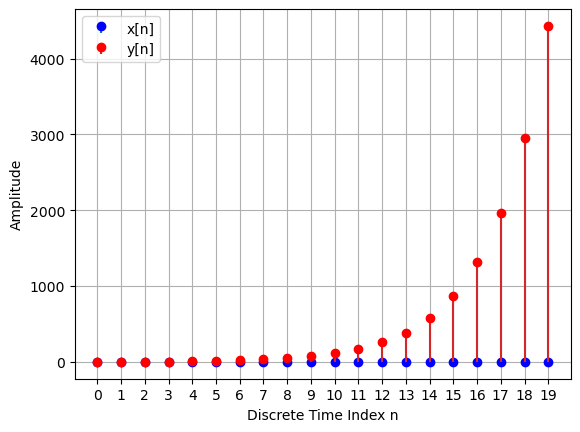

In [11]:
# Unit step input
n_samples = 20
x = np.ones(n_samples)

# Initialize output array
y_out = np.zeros(n_samples)

# Initial conditions
y_out[0] = 0
y_n_minus_1 = y_out[0]

# Loop from n = 1 
for n in range(1, n_samples):
    x_n = x[n]
    y_n = 1.5*y_n_minus_1+ x_n
    y_out[n] = y_n
    # Update
    y_n_minus_1 = y_n  

# Plotting
n = np.arange(n_samples)
plt.stem(n, x, linefmt='tab:blue', markerfmt='bo', basefmt=' ', label='x[n]')
plt.stem(n, y_out, linefmt='tab:red', markerfmt='ro', basefmt=' ', label='y[n]')
plt.xlabel('Discrete Time Index n')
plt.ylabel('Amplitude')
plt.xticks(n)
plt.grid(True)
plt.legend()

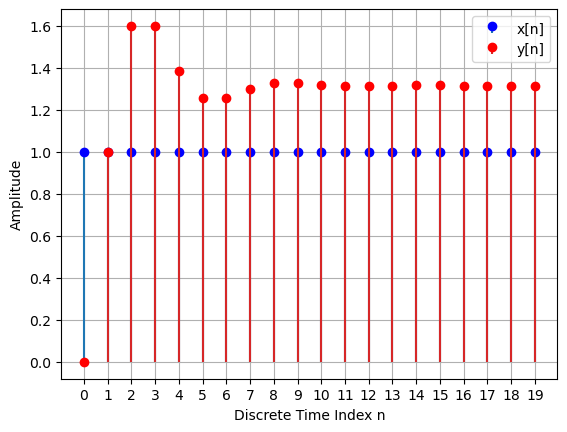

In [12]:
# Unit step input
n_samples = 20
x = np.ones(n_samples)

# Initialize output array
y_out = np.zeros(n_samples)

# Initial condition
y_out[0] = 0
y_out[1] = 0
y_n_minus_2 = y_out[0]
y_n_minus_1 = y_out[1]

# Loop from n = 1 
for n in range(1, n_samples):
    x_n = x[n]
    y_n = 0.6*y_n_minus_1 -0.36*y_n_minus_2 + x_n
    y_out[n] = y_n
    # Update
    y_n_minus_2 = y_n_minus_1
    y_n_minus_1 = y_n  

# Plotting
n = np.arange(n_samples)
plt.stem(n, x, linefmt='tab:blue', markerfmt='bo', basefmt=' ', label='x[n]')
plt.stem(n, y_out, linefmt='tab:red', markerfmt='ro', basefmt=' ', label='y[n]')
plt.xlabel('Discrete Time Index n')
plt.ylabel('Amplitude')
plt.xticks(n)
plt.grid(True)
plt.legend()

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Response Plot: 1 pt</strong>
</span>

The transfer function of **System 1** is:
    $$H(z) = \frac{1}{1-1.5z^{-1}}$$

The transfer function of **System 2** is:
    $$H(z) = \frac{1}{1-0.6z^{-1}+0.36z^{-2}}$$

Now it is your job, 

* Calculate the All roots of its the denominator (i.e., all poles of $H(z)$). 
* Exam if they lie inside the unit circle in the Complex Plane.
* Indicate the BIBO stabilty. 

Does it match what your plot shows?

In [9]:
# System 1
print(np.roots([1, -1.5]))

# System 2
print(np.roots([1, -0.6, 0.36]))

[1.5]
[0.3+0.51961524j 0.3-0.51961524j]


In [10]:
# Check if inside a unit circle

# If a point (x,y) on Unit circle is: x^2 + y^2 =1

# If a point (x,y) inside Unit circle: x^2 + y^2 < 1

# For a root is z = 0.3+0.5j  Its Re part is x, Its Im part is y.

0.3**2+0.5**2

0.3599999976402576

* System 1 is unstable
* System 2 is stable

<span style="border-left: 4px solid #FFA500; padding: 5px; background-color: #FFF4E5; display: inline-block;">
    <strong>Stability: 1 pt</strong>
</span>

<div style="border-left: 4px solid #28a745; padding: 10px; background-color: #f9fff3; margin-top: 10px;">
  <h2 style="margin: 0;">Submit in .pdf</h2>
</div>


